In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
train_in = pd.read_csv("../../data/train_in.csv", header=None)
test_in = pd.read_csv("../../data/test_in.csv", header=None)
train_out = pd.read_csv("../../data/train_out.csv", header=None)
test_out = pd.read_csv("../../data/test_out.csv", header=None)

In [23]:
X_train = train_in.to_numpy(dtype=np.float64)
X_test = test_in.to_numpy(dtype=np.float64)
y_train = train_out.to_numpy(dtype=np.int64).ravel()
y_test = test_out.to_numpy(dtype=np.int64).ravel()

In [24]:
num_classes = 10
no_of_examples = X_train.shape[0]
num_features = X_train.shape[1]

rng = np.random.default_rng(2)
W = rng.normal(0, 0.01, size=(num_features, num_classes)).astype(np.float64)
b = rng.normal(0, 0.01, size=(num_classes,)).astype(np.float64)

train_acc_hist, train_loss_hist = [], []

epochs = 100
lr = 0.01

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

for epoch in range(1, epochs + 1):

    total_epoch_loss = 0.0
    correct_per_epoch = 0

    sum_grad_W = 0
    sum_grad_b = 0

    for example in range(no_of_examples):
        x = X_train[example]    # (256,)
        y_true = y_train[example]   # int (0-9)

        scores = b + W.T @ x    # (10,)
        probabilities = softmax(scores) # (10,)

        prediction = np.argmax(probabilities)
        if prediction == y_true:
            correct_per_epoch += 1

        y_vec = np.zeros(num_classes, dtype=np.float64)
        y_vec[y_true] = 1.0

        class_wise_error = probabilities - y_vec

        example_loss = np.sum(class_wise_error ** 2)
        total_epoch_loss += float(example_loss)

        grad_b = 2 * class_wise_error
        grad_W = 2 * np.outer(x, class_wise_error)

        sum_grad_W += grad_W
        sum_grad_b += grad_b

        # W -= lr * grad_W
        # b -= lr * grad_b

    W -= lr * (sum_grad_W / no_of_examples)
    b -= lr * (sum_grad_b / no_of_examples)

    mean_loss = total_epoch_loss / no_of_examples
    epoch_accuracy = correct_per_epoch / no_of_examples

    train_acc_hist.append(epoch_accuracy)
    train_loss_hist.append(mean_loss)

    if epoch_accuracy == 1:
        break

    print(f"Epoch {epoch:02d} | train loss: {mean_loss:.4f} | train acc: {epoch_accuracy:.4f}")

Epoch 01 | train loss: 0.9068 | train acc: 0.0504
Epoch 02 | train loss: 0.8778 | train acc: 0.3357
Epoch 03 | train loss: 0.8473 | train acc: 0.3702
Epoch 04 | train loss: 0.8171 | train acc: 0.3726
Epoch 05 | train loss: 0.7884 | train acc: 0.3796
Epoch 06 | train loss: 0.7618 | train acc: 0.4042
Epoch 07 | train loss: 0.7376 | train acc: 0.4288
Epoch 08 | train loss: 0.7155 | train acc: 0.4517
Epoch 09 | train loss: 0.6954 | train acc: 0.4815
Epoch 10 | train loss: 0.6769 | train acc: 0.5103
Epoch 11 | train loss: 0.6598 | train acc: 0.5349
Epoch 12 | train loss: 0.6440 | train acc: 0.5636
Epoch 13 | train loss: 0.6291 | train acc: 0.5970
Epoch 14 | train loss: 0.6151 | train acc: 0.6210
Epoch 15 | train loss: 0.6018 | train acc: 0.6456
Epoch 16 | train loss: 0.5892 | train acc: 0.6684
Epoch 17 | train loss: 0.5771 | train acc: 0.6842
Epoch 18 | train loss: 0.5654 | train acc: 0.7018
Epoch 19 | train loss: 0.5543 | train acc: 0.7118
Epoch 20 | train loss: 0.5435 | train acc: 0.7264


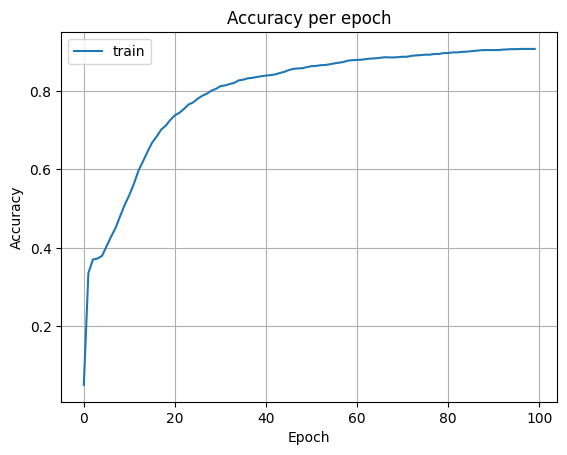

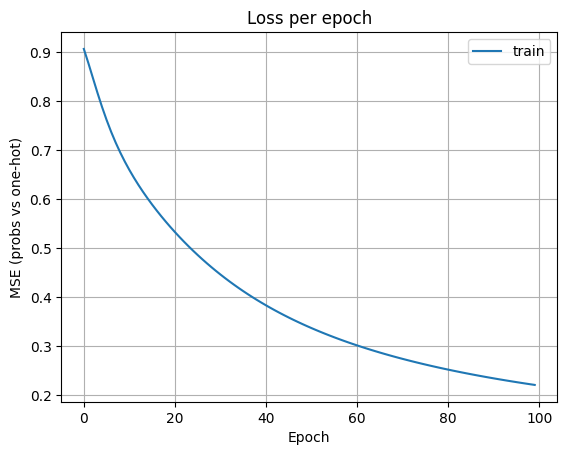

In [25]:
plt.figure()
plt.plot(range(len(train_acc_hist)), train_acc_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.grid(True); plt.legend()

plt.figure()
plt.plot(range(len(train_loss_hist)), train_loss_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("MSE (probs vs one-hot)")
plt.title("Loss per epoch")
plt.grid(True); plt.legend()

plt.show()

In [26]:
def run_training(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, init="normal", seed=2):
    rng = np.random.default_rng(seed)

    if init == "zeros":
        W = np.zeros((num_features, num_classes), dtype=np.float64)
        b = np.zeros(num_classes, dtype=np.float64)
    elif init == "normal":
        W = rng.normal(0, 0.01, size=(num_features, num_classes)).astype(np.float64)
        b = rng.normal(0, 0.01, size=(num_classes,)).astype(np.float64)
    elif init == "uniform":
        W = rng.uniform(-0.01, 0.01, size=(num_features, num_classes)).astype(np.float64)
        b = rng.uniform(-0.01, 0.01, size=(num_classes,)).astype(np.float64)
    else:
        raise ValueError("init must be 'zeros', 'normal', or 'uniform'")

    train_acc_hist, train_loss_hist = [], []
    test_acc_hist,  test_loss_hist  = [], []

    for epoch in range(1, epochs + 1):
        total_epoch_loss = 0.0
        correct_per_epoch = 0
        sum_grad_W = np.zeros_like(W)
        sum_grad_b = np.zeros_like(b)

        for i in range(no_of_examples):
            x = X_train[i]    # (256,)
            y_true = y_train[i]

            scores = b + W.T @ x
            probs  = softmax(scores)

            pred = np.argmax(probs)
            if pred == y_true:
                correct_per_epoch += 1

            y_vec = np.zeros(num_classes, dtype=np.float64)
            y_vec[y_true] = 1.0

            err = probs - y_vec
            total_epoch_loss += float(np.sum(err**2))

            grad_b = 2 * err
            grad_W = 2 * np.outer(x, err)

            sum_grad_W += grad_W
            sum_grad_b += grad_b

        W -= lr * (sum_grad_W / no_of_examples)
        b -= lr * (sum_grad_b / no_of_examples)

        mean_loss = total_epoch_loss / no_of_examples
        acc = correct_per_epoch / no_of_examples
        train_acc_hist.append(acc)
        train_loss_hist.append(mean_loss)

        test_correct = 0
        test_loss = 0.0
        for j in range(X_test.shape[0]):
            x = X_test[j]
            y_true = y_test[j]
            scores = b + W.T @ x
            probs  = softmax(scores)
            pred   = np.argmax(probs)
            if pred == y_true:
                test_correct += 1
            y_vec = np.zeros(num_classes, dtype=np.float64)
            y_vec[y_true] = 1.0
            err = probs - y_vec
            test_loss += float(np.sum(err**2))
        test_acc = test_correct / X_test.shape[0]
        test_loss /= X_test.shape[0]

        test_acc_hist.append(test_acc)
        test_loss_hist.append(test_loss)

    return {
        "init": init,
        "lr": lr,
        "train_acc": train_acc_hist,
        "train_loss": train_loss_hist,
        "test_acc": test_acc_hist,
        "test_loss": test_loss_hist
    }

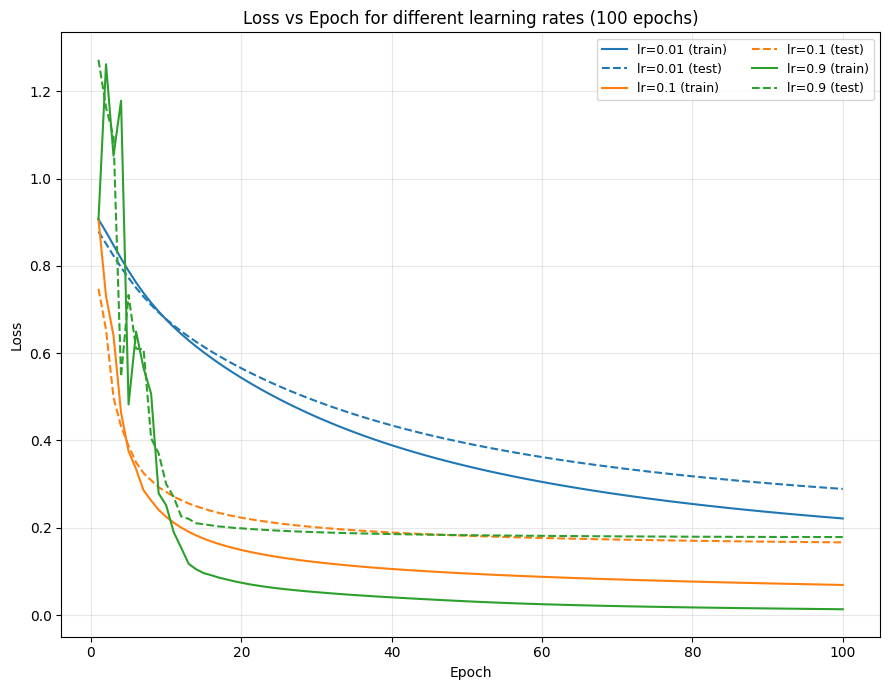

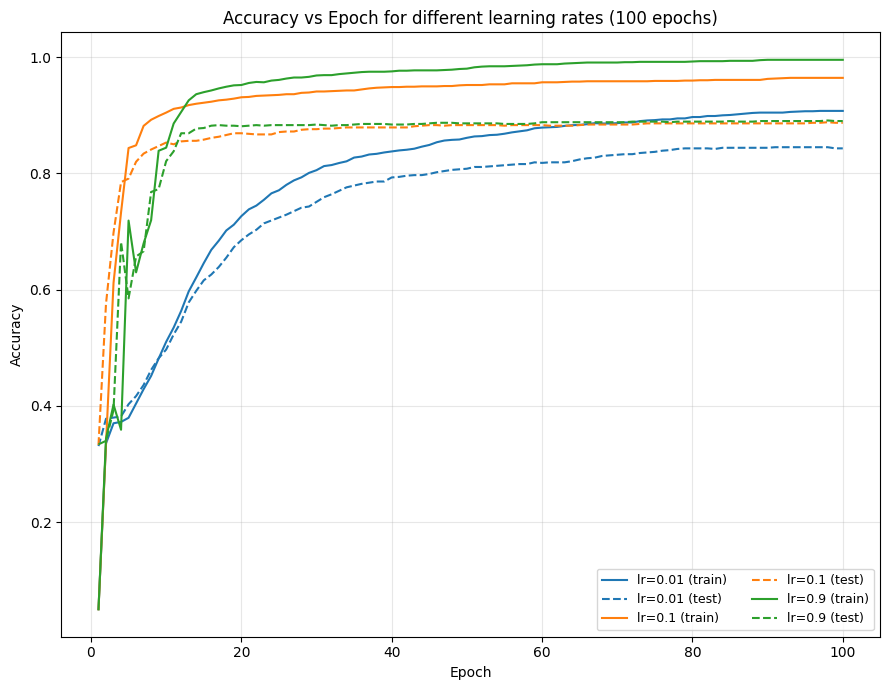

Best test accuracy: 0.8910 with lr=0.9


In [27]:
lrs = [0.01, 0.1, 0.9]
epochs = 100

results = [run_training(X_train, y_train, X_test, y_test, lr=lr, epochs=epochs) for lr in lrs]

colors = {0.01: "tab:blue", 0.1: "tab:orange", 0.9: "tab:green"}

# ---------- Loss ----------
plt.figure(figsize=(9,7))
for res in results:
    x = np.arange(1, len(res["train_loss"])+1)
    plt.plot(x, res["train_loss"], color=colors[res["lr"]], linestyle="-",  label=f"lr={res['lr']} (train)")
    plt.plot(x, res["test_loss"],  color=colors[res["lr"]], linestyle="--", label=f"lr={res['lr']} (test)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Loss vs Epoch for different learning rates (100 epochs)")
plt.grid(True, alpha=0.3); plt.legend(ncol=2, fontsize=9)
plt.tight_layout(); plt.show()

# ---------- Accuracy ----------
plt.figure(figsize=(9,7))
best_run = None
best_acc = 0
for res in results:
    run_max = max(res["test_acc"])
    if run_max > best_acc:
        best_acc = run_max
        best_run = res
    x = np.arange(1, len(res["train_acc"])+1)
    plt.plot(x, res["train_acc"], color=colors[res["lr"]], linestyle="-",  label=f"lr={res['lr']} (train)")
    plt.plot(x, res["test_acc"],  color=colors[res["lr"]], linestyle="--", label=f"lr={res['lr']} (test)")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch for different learning rates (100 epochs)")
plt.grid(True, alpha=0.3); plt.legend(ncol=2, fontsize=9)
plt.tight_layout(); plt.show()

print(f"Best test accuracy: {best_acc:.4f} with lr={best_run['lr']}")

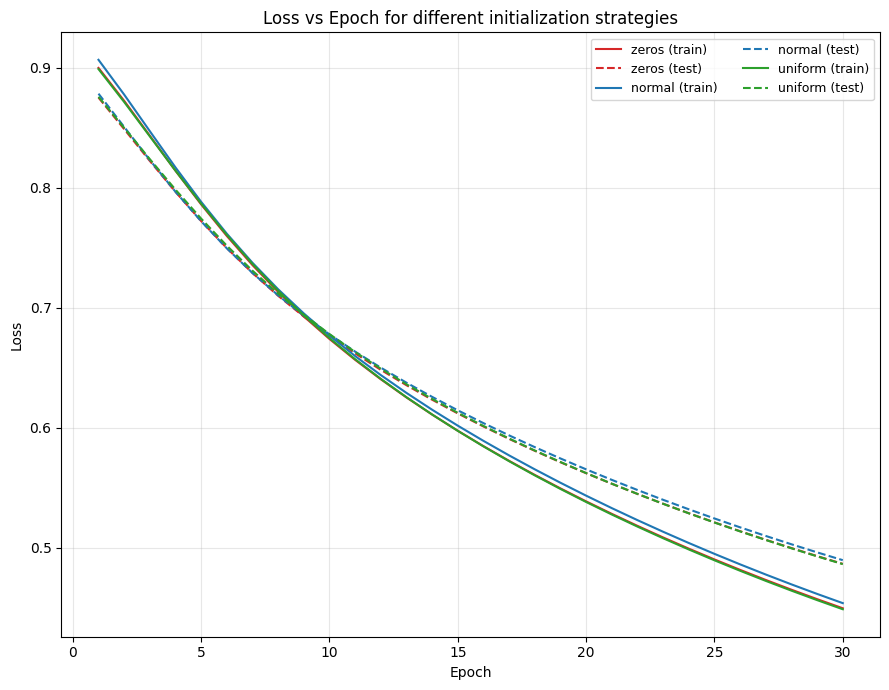

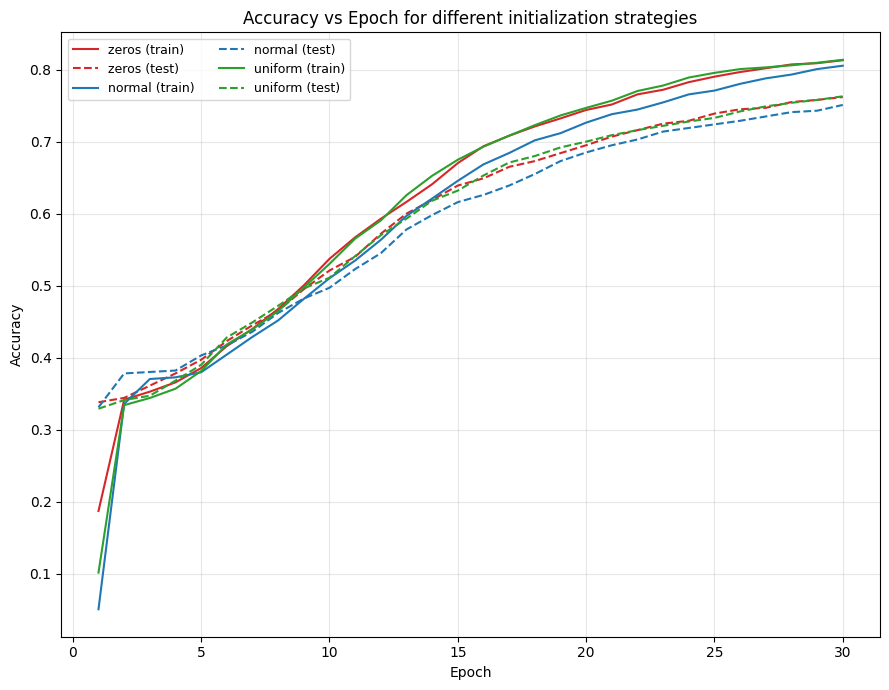

In [28]:
inits = ["zeros", "normal", "uniform"]
epochs = 30
lr = 0.01

results = [run_training(X_train, y_train, X_test, y_test, lr=lr, epochs=epochs, init=init) for init in inits]

color_map = {"zeros": "tab:red", "normal": "tab:blue", "uniform": "tab:green"}

plt.figure(figsize=(9,7))
for res in results:
    x = np.arange(1, len(res["train_loss"])+1)
    plt.plot(x, res["train_loss"], color=color_map[res["init"]], linestyle="-",  label=f"{res['init']} (train)")
    plt.plot(x, res["test_loss"],  color=color_map[res["init"]], linestyle="--", label=f"{res['init']} (test)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Loss vs Epoch for different initialization strategies")
plt.grid(True, alpha=0.3); plt.legend(ncol=2, fontsize=9)
plt.tight_layout(); plt.show()

plt.figure(figsize=(9,7))
for res in results:
    x = np.arange(1, len(res["train_acc"])+1)
    plt.plot(x, res["train_acc"], color=color_map[res["init"]], linestyle="-",  label=f"{res['init']} (train)")
    plt.plot(x, res["test_acc"],  color=color_map[res["init"]], linestyle="--", label=f"{res['init']} (test)")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch for different initialization strategies")
plt.grid(True, alpha=0.3); plt.legend(ncol=2, fontsize=9)
plt.tight_layout(); plt.show()